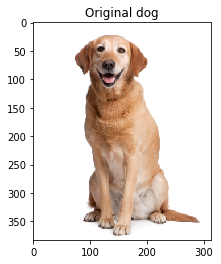

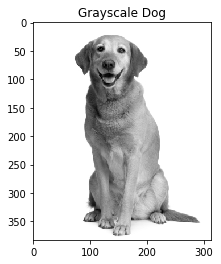

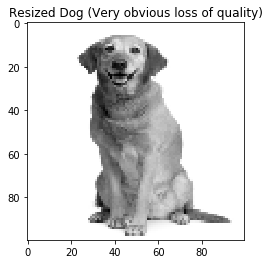

In [4]:
#Part 2 - Genetic Algorithm
'''
Trying to use genetic algorithms to convert a randomly generated grayscale
(100x100) image into the resized/grayscaled dog image from above.
'''
#Load Image, Transform to Grayscale, Resize
import cv2 
import numpy as np
import matplotlib.pyplot as plt
dog = cv2.imread('./images/dog.jpg')
#By Default OpenCV2 reads images as B,G,R
#Matplotlib reads reads images R,G,B
b,g,r = cv2.split(dog)
dog = cv2.merge([r,g,b])
plt.imshow(dog)
plt.title("Original dog")
plt.show()

#OpenCV function to convert dog to grayscale
dog = cv2.cvtColor(dog, cv2.COLOR_BGR2GRAY)
plt.imshow(dog, cmap = 'gray')
plt.title("Grayscale Dog")
plt.show()

dog = cv2.resize(dog, (100, 100))
plt.imshow(dog, cmap='gray')
plt.title("Resized Dog (Very obvious loss of quality)")
plt.show()

(100, 100)


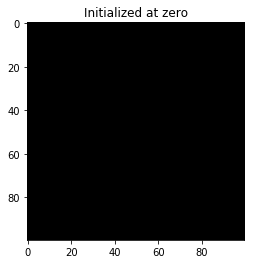

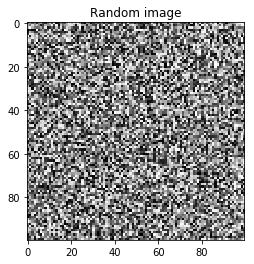

In [30]:
#Generate Random Image (Milestone 2)
GenerationX = np.zeros((100, 100), np.uint8)
print(GenerationX.shape)
plt.imshow(GenerationX, cmap = 'gray')
plt.title("Initialized at zero")
plt.show()
for i in range(0,100):
    for j in range(0,100):
        GenerationX[i][j] = np.random.randint(0,255)
plt.imshow(GenerationX, cmap = 'gray')
plt.title("Random image")
plt.show()

In [31]:
import operator
import time
'''
Compute Distance takes in a single image X [[]] and a target [[]]
Compute Distance uses the L1 distance to compute the distance from image
X to the target image.

In: Target [[]], X [[]]
Out: Int
'''
def computeDistance(target, X):
    total = 0
    for i in range(100):
        for j in range(100):
            total += abs(int(target[i][j])-int(X[i][j]))
    return total
'''
getMin3 takes in a target [[]] and a generation [[[]]]
getMin3 uses a dictionary to sort the array of images based on
the distance scores
getMin3 returns the indices of generation that contain the 3 lowest values
according to the distance function

In: Target [[]], generation [[[]]]
    len(generation) = 10 in this example
Out: Indices []
    len(Indices) = 3
'''
def getMin3(target, generation):
    genMetrics = {}
    for i in range(10):
        distance = computeDistance(dog, generation[i])
        index = i
        genMetrics.update({distance: index})
    sortedMetrics = sorted(genMetrics.items(),key=operator.itemgetter(0))
    Indices = [sortedMetrics[0][1], sortedMetrics[1][1], sortedMetrics[2][1]]
    return Indices
'''
Selection takes in the target [[]] and generation [[[]]], calls getMin3
to get the indices of generation that contain the 3 closest images (according)
to the distance function. Selection returns these 3 images

In: Target [[]], generation [[[]]]
    len generation = 10, in this example
Out: parents
'''
def Selection(target, generation):
    indices = getMin3(target, generation)
    index1, index2, index3 = indices[0], indices[1], indices[2]
    parents = [generation[index1], generation[index2], generation[index3]]
    return parents

'''
Mutate takes in the target and the parents from Selection
'''
def Mutate(target, parents):
    nextGen = []
    #keep the best parent for each next generation
    nextGen.append(parents[0])
    for i in range(5):
        
        # Copy contents of parents[0] into Mut1
        Mut1 = np.zeros((100, 100))
        for pX in range(100):
            for pY in range(100):
                Mut1[pX][pY] = parents[0][pX][pY]
        #End of Copying
        
        for x in range(100):
            for y in range(100):
                action = np.random.randint(-1,2)
                if (action == 1):
                    Mut1[x][y] += np.random.randint(-1,1)
        #TEST LINE
        print("Mut1 sample " + str(1+i) + ": Distance from Target")
        print(computeDistance(target, Mut1))
        nextGen.append(Mut1)

    for j in range(3):
        
        # Copy contents of parents[0] into Mut1
        Mut2 = np.zeros((100, 100))
        for pX in range(100):
            for pY in range(100):
                Mut2[pX][pY] = parents[1][pX][pY]
        #End of Copying
        
        for x in range(100):
            for y in range(100):
                Mut2[x][y] += np.random.randint(-5,5)
        #TEST LINE
        print("Mut2 sample " + str(5+j) + ": Distance from Target")
        print(computeDistance(target, Mut2))
        nextGen.append(Mut2)
    
    for k in range(1):
        
        # Copy contents of parents[0] into Mut1
        Mut3 = np.zeros((100, 100))
        for pX in range(100):
            for pY in range(100):
                Mut3[pX][pY] = parents[2][pX][pY]
        #End of Copying
        
        for x in range(100):
            for y in range(100):
                Mut3[x][y] += np.random.randint(-10,10)
        #TEST LINE
        print("Mut3 sample " + str(8+k) + ": Distance from Target")
        print(computeDistance(target, Mut3))
        nextGen.append(Mut3)
    
    return nextGen

def Initialize():
    generation = []
    for i in range(10):
        entry = np.zeros((100,100))
        for i in range(0, 100):
            for j in range(0, 100):
                entry[i][j] = np.random.randint(0, 255)
        generation.append(entry)
    return generation
        
def Evolve(target, iterations):
    nextGen = [[[]]]
    for i in range(iterations):
        if (i == 0):
            nextGen = Initialize()
        
        parents = Selection(target, nextGen)
        
        print("")
        print("PARENTS")
        for i in range(len(parents)):
            print(computeDistance(dog, parents[i]))
        print("")
        
        nextGen = Mutate(dog, parents)
    parents = Selection(target, nextGen)
    return parents[0]

start = time.time()
Lebron = Evolve(dog, 10)
end = time.time()
print("TIME TAKEN: " + str(end-start) + " Seconds")
print(computeDistance(dog, Lebron))
plt.imshow(Lebron, cmap = 'gray')
plt.show()
    
    


PARENTS
1077223
1087688
1090486

Mut1 sample 1: Distance from Target
1078391
Mut1 sample 2: Distance from Target
1078362
Mut1 sample 3: Distance from Target
1078358
Mut1 sample 4: Distance from Target
1078393
Mut1 sample 5: Distance from Target
1078363
Mut2 sample 5: Distance from Target
1091102
Mut2 sample 6: Distance from Target
1091245
Mut2 sample 7: Distance from Target
1090927
Mut3 sample 8: Distance from Target
1094403

PARENTS
1077223
1078358
1078362

Mut1 sample 1: Distance from Target
1078340
Mut1 sample 2: Distance from Target
1078350
Mut1 sample 3: Distance from Target
1078400
Mut1 sample 4: Distance from Target
1078371
Mut1 sample 5: Distance from Target
1078309
Mut2 sample 5: Distance from Target
1081963
Mut2 sample 6: Distance from Target
1081894
Mut2 sample 7: Distance from Target
1081802
Mut3 sample 8: Distance from Target
1081651

PARENTS
1077223
1078309
1078340

Mut1 sample 1: Distance from Target
1078321
Mut1 sample 2: Distance from Target
1078441
Mut1 sample 3: Dis

KeyboardInterrupt: 